<a href="https://colab.research.google.com/github/welting82/AIclass/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


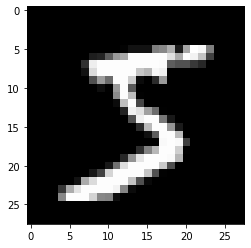

In [35]:
# matplotlib colormap
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
pd.DataFrame(x_train[idx])
# , cmap="PiYG_r"
print(y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [36]:
from tensorflow.keras.models import Sequential
# 全連接層
from tensorflow.keras.layers import Dense
layers = [
  # 784 * 128 + 128(bias) = 100480
  Dense(128, activation="relu", input_dim=784),
  # 128 * 10 + 10(bias) = 1290
  Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 多個輸出(多元分類): CategoricalCrossEntropy sigma(pilog1/qi)
# 單個輸出(二元分類): BinaryCrossEntropy plog1/q + (1-p)log1/(1-q)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
        optimizer="adam",
        metrics=["accuracy"])

In [38]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
# -1:自動算
x_train_norm = x_train.reshape(-1,784) / 255.0
x_test_norm = x_test.reshape(-1,784) / 255.0
pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


In [40]:
from tensorflow.keras import callbacks
#一輪: 60000 * 0.9 / 100 -> 540次梯度下降
# epochs:整份資料看幾輪
# verbose: 0(quiet), 1(完整), 2(無進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=30,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

Epoch 1/30
540/540 - 2s - loss: 0.3585 - accuracy: 0.9015 - val_loss: 0.1645 - val_accuracy: 0.9547 - 2s/epoch - 4ms/step
Epoch 2/30
540/540 - 2s - loss: 0.1672 - accuracy: 0.9528 - val_loss: 0.1176 - val_accuracy: 0.9695 - 2s/epoch - 3ms/step
Epoch 3/30
540/540 - 2s - loss: 0.1192 - accuracy: 0.9665 - val_loss: 0.0935 - val_accuracy: 0.9737 - 2s/epoch - 3ms/step
Epoch 4/30
540/540 - 2s - loss: 0.0922 - accuracy: 0.9733 - val_loss: 0.0903 - val_accuracy: 0.9732 - 2s/epoch - 3ms/step
Epoch 5/30
540/540 - 2s - loss: 0.0739 - accuracy: 0.9779 - val_loss: 0.0778 - val_accuracy: 0.9777 - 2s/epoch - 3ms/step
Epoch 6/30
540/540 - 2s - loss: 0.0619 - accuracy: 0.9821 - val_loss: 0.0804 - val_accuracy: 0.9767 - 2s/epoch - 3ms/step
Epoch 7/30
540/540 - 2s - loss: 0.0507 - accuracy: 0.9856 - val_loss: 0.0770 - val_accuracy: 0.9775 - 2s/epoch - 3ms/step
Epoch 8/30
540/540 - 2s - loss: 0.0427 - accuracy: 0.9881 - val_loss: 0.0780 - val_accuracy: 0.9760 - 2s/epoch - 3ms/step
Epoch 9/30
540/540 - 2s 

In [41]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9767


[0.078935906291008, 0.9767000079154968]

In [42]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# tensorflow: one-hot sklearn: original
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(True)".format(i) for i in range(10)],
      columns=["{}(Pred)".format(i) for i in range(10)])

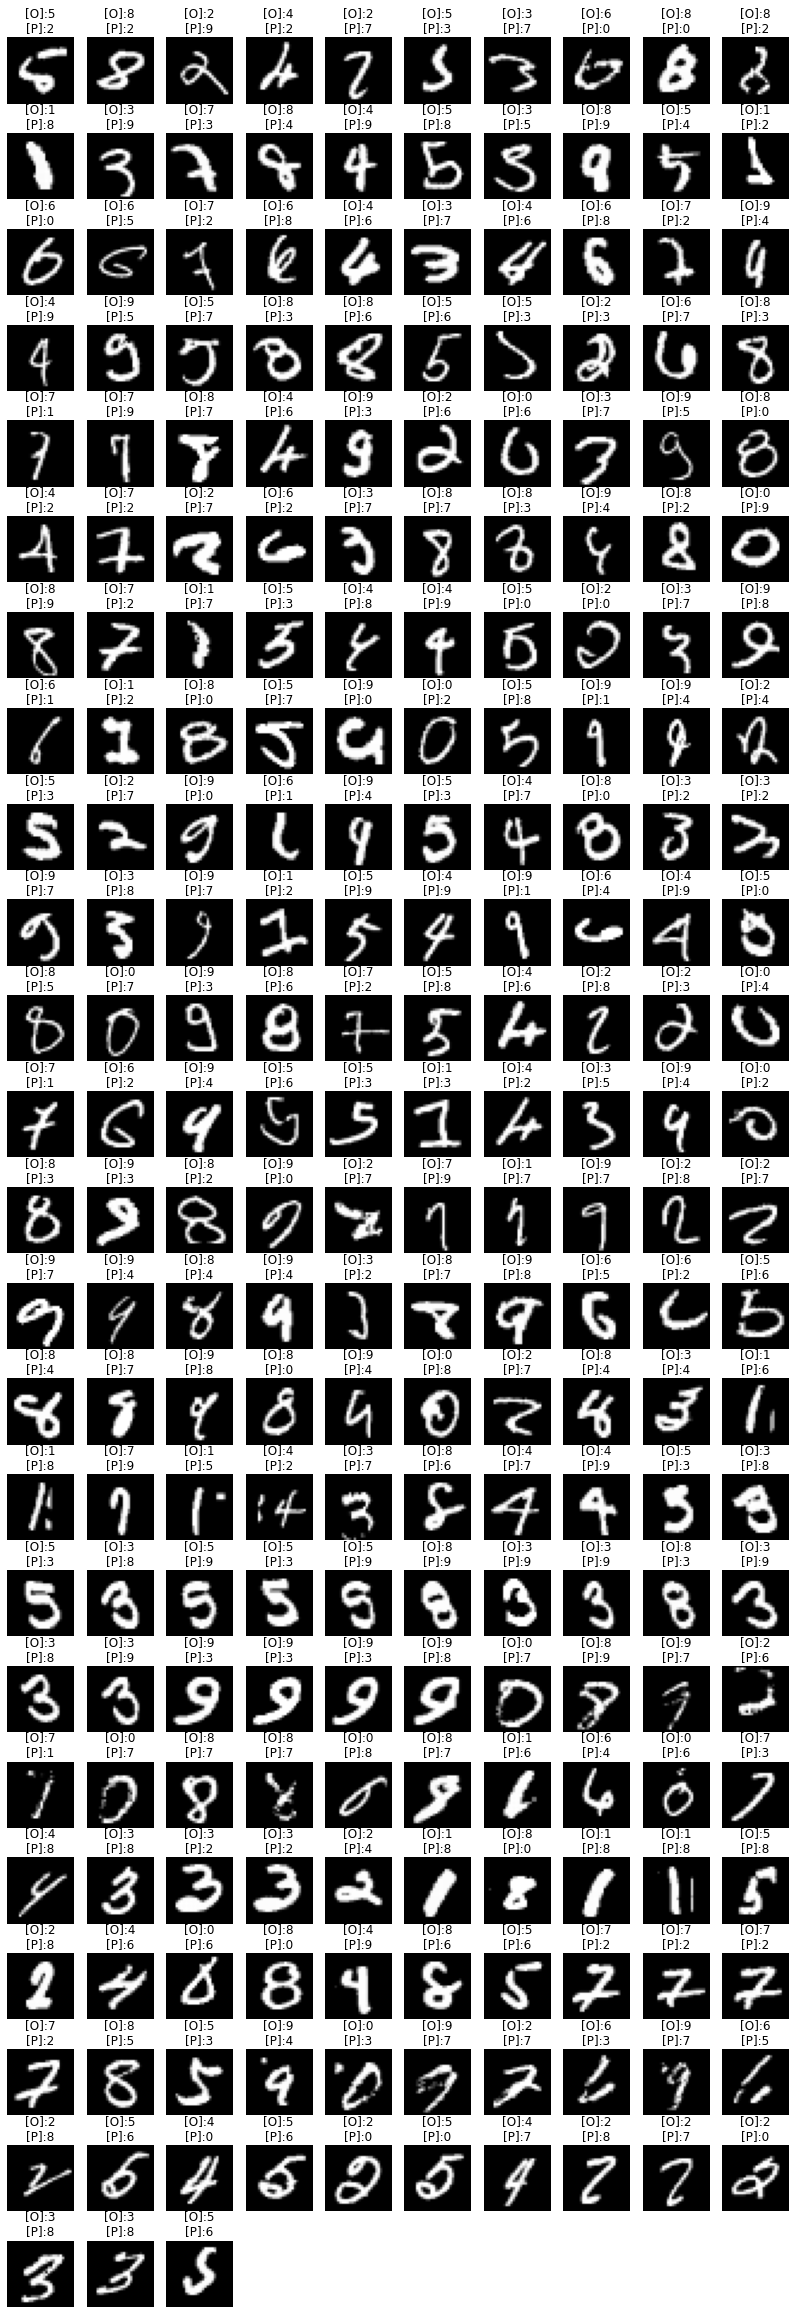

In [45]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.nonzero(y_test != pre)[0]
pre_false_label = y_test[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(pre_false_label[i], pre_false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i], cmap="gray")